<a href="https://colab.research.google.com/github/ChityalaRahul/23CSBTB39-40/blob/main/Assignment_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ASSIGNMENT-7.

Implement Support Vector Machine Classification using Breast Can-
cer Dataset

In machine learning, support vector machines (SVMs, also support vector networks) are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis.

An SVM model is a representation of the examples as points in space, mapped so that the examples of the separate categories are divided by clear gap that is as wide as possible. New examples are then mapped into that same space and predicted to belong to a category
based on which side of the gap they fall. This gap is also called maximum margin and the SVM classifier is called maximum margin clasifier.

In addition to performing linear classification, SVMs can efficiently perform a non-linear classification using what is called the kernel trick, implicitly mapping their inputs into high-dimensional feature spaces.

PART-1. Import the Libraries required for SVM.
Import all libraries required along with visualization to completed the task on SVM

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

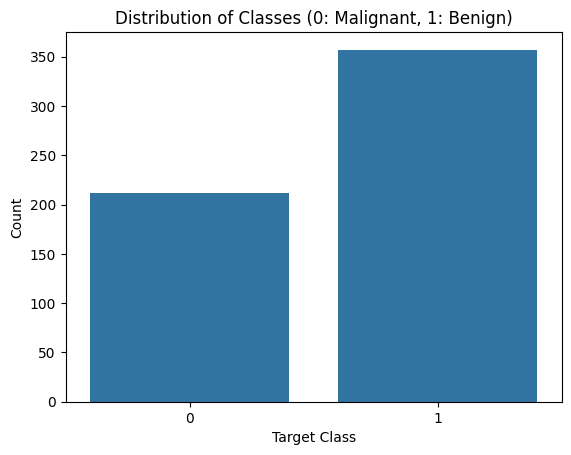

Confusion Matrix:
 [[41  1]
 [ 2 70]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.96        42
           1       0.99      0.97      0.98        72

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [2]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

# Load the Breast Cancer dataset
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Display the first few rows and class distribution
print(df.head())
sns.countplot(x='target', data=df)
plt.title('Distribution of Classes (0: Malignant, 1: Benign)')
plt.xlabel('Target Class')
plt.ylabel('Count')
plt.show()

# Data Preprocessing
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train SVM Classifier
model = SVC(kernel='linear')
model.fit(X_train, y_train)

# Make Predictions
y_pred = model.predict(X_test)

# Evaluate the Model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


2.Import the Breast Cancer Dataset from Sklearn Packages.

• Once downloaded the Breast Cancer data, prepare the dictionary format to access the data using its keys.

• Describe all the features from the dictionary, feature names.

• Setup the dataframe , describe itd details, check for missing values.

• Identify the target class and assign it to the dataframe.

• Perform exploratory analysis of dataframe using seabon - sns package

• the Draw the boxplot of first 10 columns to verify their role in cancer.


Feature Names:
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']

Description:
 .. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimet

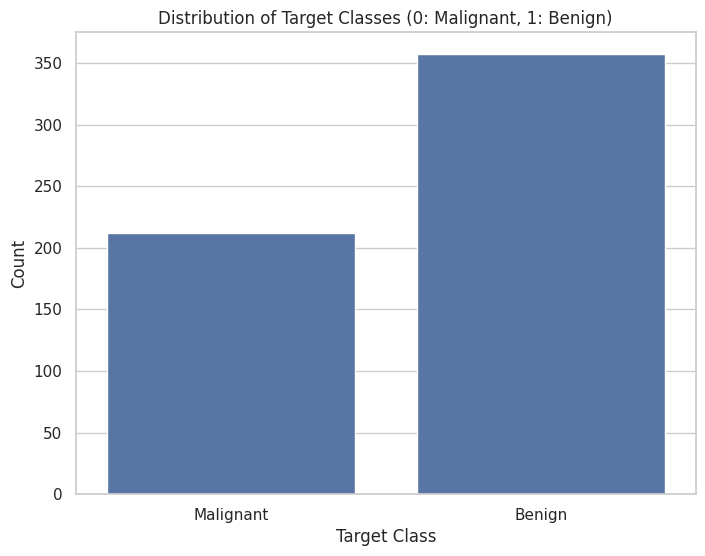

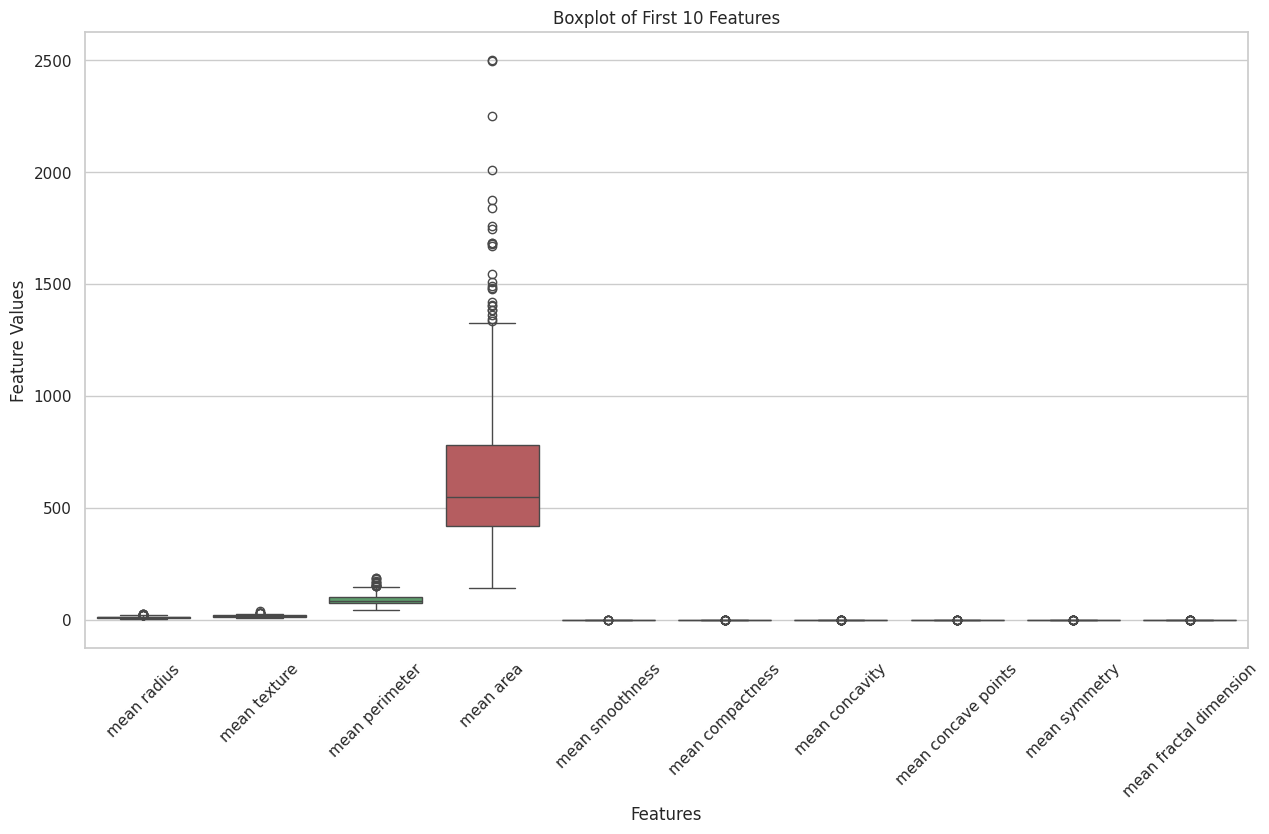

In [3]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

# Load the Breast Cancer dataset
cancer_data = load_breast_cancer()

# Prepare the dictionary format
data_dict = {
    "data": cancer_data.data,
    "feature_names": cancer_data.feature_names,
    "target": cancer_data.target,
    "target_names": cancer_data.target_names,
    "DESCR": cancer_data.DESCR
}

# Print feature names and description
print("Feature Names:\n", data_dict["feature_names"])
print("\nDescription:\n", data_dict["DESCR"])

# Create DataFrame and check for missing values
df = pd.DataFrame(data_dict["data"], columns=data_dict["feature_names"])
print("\nMissing Values:\n", df.isnull().sum())
print("\nDataFrame Description:\n", df.describe())

# Assign the target class to the DataFrame
df['target'] = cancer_data.target
print("\nDataFrame with Target:\n", df.head())

# Exploratory Data Analysis
sns.set(style='whitegrid')

# Countplot of target classes
plt.figure(figsize=(8, 6))
sns.countplot(x='target', data=df)
plt.title('Distribution of Target Classes (0: Malignant, 1: Benign)')
plt.xlabel('Target Class')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Malignant', 'Benign'])
plt.show()

# Boxplot of the first 10 features
plt.figure(figsize=(15, 8))
sns.boxplot(data=df.iloc[:, :10])
plt.title('Boxplot of First 10 Features')
plt.xticks(rotation=45)
plt.ylabel('Feature Values')
plt.xlabel('Features')
plt.show()


3.Train and Test Data.

• Prepare the Train and Test data from the dataframe.

• Drop the cancer columns and define the dataframe with only target results

• Split the data into train, test using train test split

In [4]:
# Import Libraries for splitting
from sklearn.model_selection import train_test_split

# Prepare Train and Test Data

# Define features (X) by dropping the target column
X = df.drop('target', axis=1)

# Define target (y)
y = df['target']

# Split the data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Display the shapes of the resulting datasets
print("Training set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)


Training set shape: (455, 30) (455,)
Test set shape: (114, 30) (114,)


4.Train the SVC using the Train Dataset.

•import sklearn.svm import SVC

•Apply the model.fit to datase

In [5]:
# Import SVC from sklearn
from sklearn.svm import SVC

# Initialize the SVC model with a linear kernel
model = SVC(kernel='linear')

# Fit the model to the training dataset
model.fit(X_train, y_train)

# Display a message indicating that the model has been trained
print("SVC model trained successfully.")


SVC model trained successfully.


5.Predict and Analysis the Performance of the SVC Model.

•Apply model.predict(X test)

•Generate the classification report, confusion matrix using sklearn.metrics

In [6]:
# Import necessary metrics
from sklearn.metrics import classification_report, confusion_matrix

# Make predictions on the test set
y_pred = model.predict(X_test)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Generate the classification report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:\n", class_report)


Confusion Matrix:
 [[38  4]
 [ 1 71]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.90      0.94        42
           1       0.95      0.99      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



6.Improve the Accuracy of Model using GridSearchCV Model.

•Given the following parameters validate the GridSearchCV Model:
param grid = ’C’: [0.1,1, 10, 100, 1000], ’gamma’: [1,0.1,0.01,0.001,00001]’kernel’: [’rbf’]

•Implement the model.predict

•Generate the classification report, confusion matrix using sklearn.metrics


In [7]:
# Import necessary libraries
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf']
}

# Initialize the SVC model
svc = SVC()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, scoring='accuracy', cv=5)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get the best model from grid search
best_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred_best = best_model.predict(X_test)

# Generate the confusion matrix
conf_matrix_best = confusion_matrix(y_test, y_pred_best)
print("Confusion Matrix:\n", conf_matrix_best)

# Generate the classification report
class_report_best = classification_report(y_test, y_pred_best)
print("\nClassification Report:\n", class_report_best)

# Display the best parameters
print("\nBest Parameters from Grid Search:\n", grid_search.best_params_)


Confusion Matrix:
 [[38  4]
 [ 4 68]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.90      0.90        42
           1       0.94      0.94      0.94        72

    accuracy                           0.93       114
   macro avg       0.92      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114


Best Parameters from Grid Search:
 {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
